In [50]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split
from torch.utils.data import Dataset, DataLoader

from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# torch.seed(42)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

datafolder = "./data/"
merge_df = pd.DataFrame()
for i, file in enumerate(os.listdir(datafolder)):
    if i == 0:
        merge_df = pd.read_csv(datafolder + file)
    else:
        df = pd.read_csv(datafolder + file)
        merge_df = pd.merge(merge_df, df, on="month")

cpu


In [51]:
def normalised(df, min_max=True):
    excluded_columns = ["month"]
    merge_df_normalized_gaussian = df.copy()
    merge_df_normalized_minmax = df.copy()

    epsilon = 1e-10

    for column in merge_df_normalized_gaussian.columns:
        if column not in excluded_columns:
            merge_df_normalized_gaussian[column] = (merge_df_normalized_gaussian[column] - merge_df_normalized_gaussian[column].mean()) / merge_df_normalized_gaussian[column].std()

    for column in merge_df_normalized_minmax.columns:
        if column not in excluded_columns:
            merge_df_normalized_minmax[column] = (merge_df_normalized_minmax[column] - merge_df_normalized_minmax[column].min() + epsilon) / (merge_df_normalized_minmax[column].max() - merge_df_normalized_minmax[column].min() + epsilon)
    return merge_df_normalized_minmax if min_max else merge_df_normalized_gaussian

merge_df_normalized = normalised(merge_df, min_max=True)
merge_df_normalized

,month,maximum_rainfall_in_a_day,no_of_rainy_days,total_rainfall,rh_extremes_minimum,mean_rh,mean_sunshine_hrs,mean_temp,temp_mean_daily_max,temp_mean_daily_min
0,1982-01,0.168056,0.346154,0.139611,0.571429,0.491979,0.439394,0.121951,0.178571,0.095238
1,1982-02,0.042593,0.153846,0.036045,0.571429,0.401070,0.742424,0.414634,0.625000,0.238095
2,1982-03,0.284722,0.384615,0.209743,0.642857,0.550802,0.363636,0.439024,0.517857,0.333333
3,1982-04,0.207870,0.500000,0.204780,0.750000,0.743316,0.303030,0.390244,0.464286,0.333333
4,1982-05,0.151852,0.346154,0.133211,0.857143,0.598930,0.469697,0.634146,0.517857,0.547619
...,...,...,...,...,...,...,...,...,...,...
513,2024-10,0.304630,0.538462,0.192504,0.285714,0.368984,0.348485,0.756098,0.589286,0.690476
514,2024-11,0.328704,0.884615,0.531801,0.714286,0.668449,0.242424,0.487805,0.500000,0.500000
515,2024-12,0.354630,0.846154,0.305864,0.285714,0.465241,0.287879,0.560976,0.517857,0.571429
516,2025-01,0.725926,0.653846,0.626877,0.750000,0.609626,0.136364,0.268293,0.125000,0.404762


In [52]:
merge_df_normalized['month'] = pd.to_datetime(merge_df_normalized['month'], format='%Y-%m').dt.to_period('M')
merge_df_normalized.set_index('month', inplace=True)

merge_df_normalized

,maximum_rainfall_in_a_day,no_of_rainy_days,total_rainfall,rh_extremes_minimum,mean_rh,mean_sunshine_hrs,mean_temp,temp_mean_daily_max,temp_mean_daily_min
month,,,,,,,,,
1982-01,0.168056,0.346154,0.139611,0.571429,0.491979,0.439394,0.121951,0.178571,0.095238
1982-02,0.042593,0.153846,0.036045,0.571429,0.401070,0.742424,0.414634,0.625000,0.238095
1982-03,0.284722,0.384615,0.209743,0.642857,0.550802,0.363636,0.439024,0.517857,0.333333
1982-04,0.207870,0.500000,0.204780,0.750000,0.743316,0.303030,0.390244,0.464286,0.333333
1982-05,0.151852,0.346154,0.133211,0.857143,0.598930,0.469697,0.634146,0.517857,0.547619
...,...,...,...,...,...,...,...,...,...
2024-10,0.304630,0.538462,0.192504,0.285714,0.368984,0.348485,0.756098,0.589286,0.690476
2024-11,0.328704,0.884615,0.531801,0.714286,0.668449,0.242424,0.487805,0.500000,0.500000
2024-12,0.354630,0.846154,0.305864,0.285714,0.465241,0.287879,0.560976,0.517857,0.571429


In [ ]:
# X = merge_df_normalized.drop(columns=['total_rainfall']).values
X = merge_df_normalized.values
y = merge_df_normalized['total_rainfall'].values
SEQ_LENGTH = 12

# Function to create sequences
def create_sequences(X, y, seq_length):
    Xs, ys = [], []
    for i in range(len(X) - seq_length):
        Xs.append(X[i:i+seq_length])
        ys.append(y[i+seq_length])
    return np.array(Xs), np.array(ys)

X_seq, y_seq = create_sequences(X, y, SEQ_LENGTH)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq, test_size=0.1, shuffle=False)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, shuffle=False)

# Convert to PyTorch tensors
X_train, X_val, X_test = torch.tensor(X_train, dtype=torch.float32), torch.tensor(X_val, dtype=torch.float32), torch.tensor(X_test, dtype=torch.float32)
y_train, y_val, y_test = torch.tensor(y_train, dtype=torch.float32), torch.tensor(y_val, dtype=torch.float32), torch.tensor(y_test, dtype=torch.float32)

class RainfallDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

# Create data loaders
BATCH_SIZE = 64
train_loader = DataLoader(RainfallDataset(X_train, y_train), batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(RainfallDataset(X_val, y_val), batch_size=BATCH_SIZE, shuffle=False)
test_loader = DataLoader(RainfallDataset(X_test, y_test), batch_size=BATCH_SIZE, shuffle=False)

class RNNModel(nn.Module):
    def __init__(self, input_size, hidden_size=50, output_size=1, num_layers=3):
        super(RNNModel, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers

        # Define multi-layer RNN
        self.rnn = nn.RNN(input_size, hidden_size, num_layers, batch_first=True)

        # Fully connected layer to map hidden state to output (output_size=3)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
    
        # Forward propagate through RNN
        out, _ = self.rnn(x)

        # Apply the fully connected layer only to the last time step
        out = self.fc(out[:, -1, :])

        return out.squeeze()
    
    def init_hidden(self, batch_size):
        return torch.zeros(self.num_layers, batch_size, self.hidden_size)
    
input_size = X_train.shape[2]    
rnn_model = RNNModel(input_size).to(device)

criterion = nn.MSELoss()
optimizer = torch.optim.Adam(rnn_model.parameters(), lr=0.001)

total_train_loss = []
total_valid_loss = []
# Training loop
EPOCHS = 1000
for epoch in range(EPOCHS):
    rnn_model.train()
    total_loss = 0
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        optimizer.zero_grad()
        y_pred = rnn_model(X_batch)
        loss = criterion(y_pred, y_batch)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    
    if epoch % 100 == 0:
        total_train_loss.append(total_loss / len(train_loader))
        valid_loss = 0
        
        with torch.no_grad():
            for X_batch, y_batch in val_loader:
                X_batch, y_batch = X_batch.to(device), y_batch.to(device)
                y_pred = rnn_model(X_batch)
                loss = criterion(y_pred, y_batch)
                valid_loss += loss.item()
        
        total_valid_loss.append(valid_loss / len(val_loader))
        torch.save(rnn_model.state_dict(), f'models_cp/rnn_model-{epoch}.pth')
        
        print(f"Epoch {epoch+1}/{EPOCHS}, Train Loss: {total_train_loss[-1]:.4f}, Valid Loss: {total_valid_loss[-1]:.4f}")

Epoch 1/1000, Train Loss: 0.0606, Valid Loss: 0.0424
Epoch 101/1000, Train Loss: 0.0145, Valid Loss: 0.0132
Epoch 201/1000, Train Loss: 0.0077, Valid Loss: 0.0124
Epoch 301/1000, Train Loss: 0.0016, Valid Loss: 0.0128
Epoch 401/1000, Train Loss: 0.0004, Valid Loss: 0.0151
Epoch 501/1000, Train Loss: 0.0001, Valid Loss: 0.0142
Epoch 601/1000, Train Loss: 0.0000, Valid Loss: 0.0142
Epoch 701/1000, Train Loss: 0.0004, Valid Loss: 0.0136
Epoch 801/1000, Train Loss: 0.0008, Valid Loss: 0.0144
Epoch 901/1000, Train Loss: 0.0005, Valid Loss: 0.0159


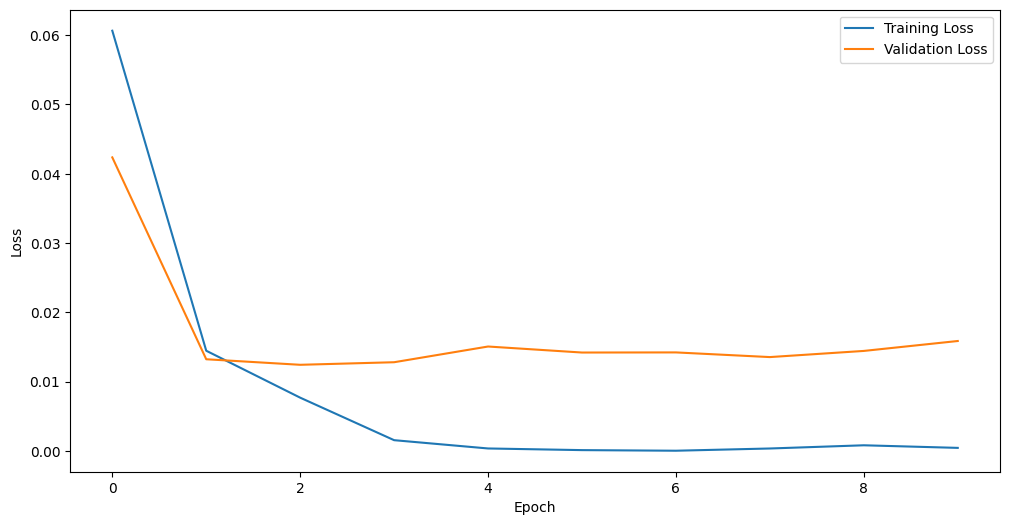

In [54]:
# plot training/validation loss curve
plt.figure(figsize=(12, 6))
plt.plot(total_train_loss, label="Training Loss")
plt.plot(total_valid_loss, label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [55]:
torch.save(rnn_model.state_dict(), 'rnn_model.pth')

RMSE: 0.1226


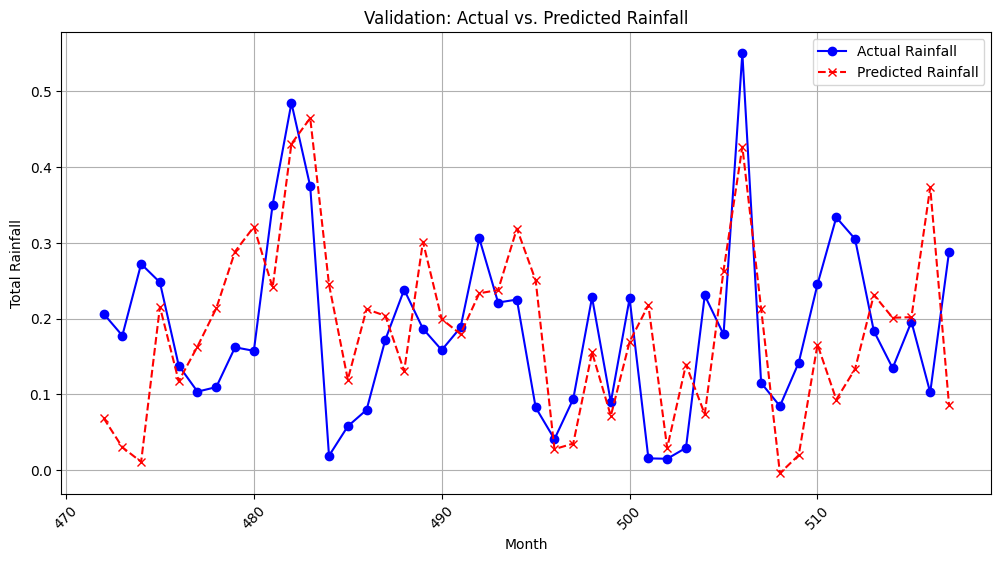

In [56]:
def evaluate_and_plot(model, data_loader, y_true, title="Actual vs. Predicted Rainfall"):
    model.eval()
    y_preds = []
    with torch.no_grad():
        for X_batch, _ in data_loader:
            X_batch = X_batch.to(device)  # Move to GPU/CPU
            y_preds.append(model(X_batch))

    y_preds = torch.cat(y_preds).cpu().numpy()

    mse = mean_squared_error(y_true.cpu().numpy(), y_preds)
    rmse = np.sqrt(mse)
    print(f"RMSE: {rmse:.4f}")

    # Move actual values to CPU if necessary
    y_true_np = y_true.cpu().numpy() if y_true.is_cuda else y_true.numpy()

    # Create time index (optional: if your dataset has a datetime index)
    time_index = df.index[-len(y_true_np):]

    plt.figure(figsize=(12, 6))
    plt.plot(time_index, y_true_np, label="Actual Rainfall", color='blue', marker='o')
    plt.plot(time_index, y_preds, label="Predicted Rainfall", color='red', linestyle='dashed', marker='x')

    plt.xlabel("Month")
    plt.ylabel("Total Rainfall")
    plt.title(title)
    plt.legend()
    plt.xticks(rotation=45)  # Rotate x-axis labels for readability
    plt.grid(True)
    plt.show()

# Example usage for validation data
evaluate_and_plot(rnn_model, val_loader, y_val, title="Validation: Actual vs. Predicted Rainfall")

RMSE: 0.2084


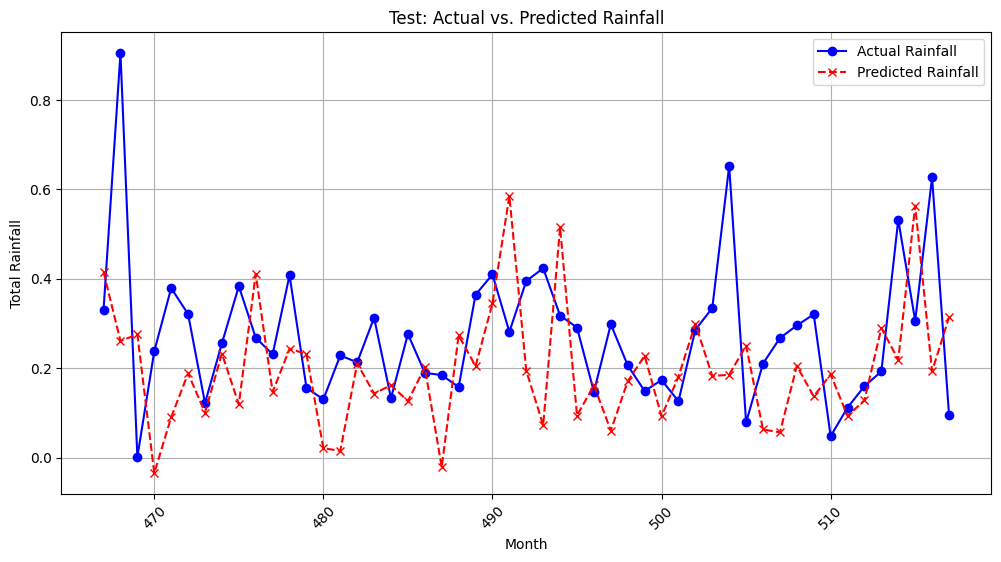

In [57]:
# Example usage for test data
evaluate_and_plot(rnn_model, test_loader, y_test, title="Test: Actual vs. Predicted Rainfall")

## Display losses for best model weights
### (Run below cells to use saved model weights)

RMSE: 0.1151


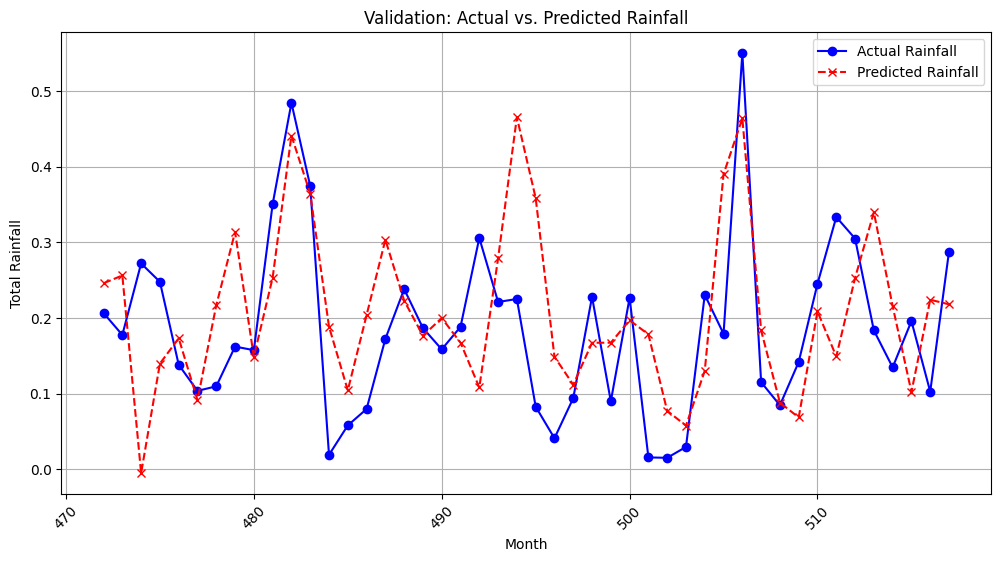

RMSE: 0.1614


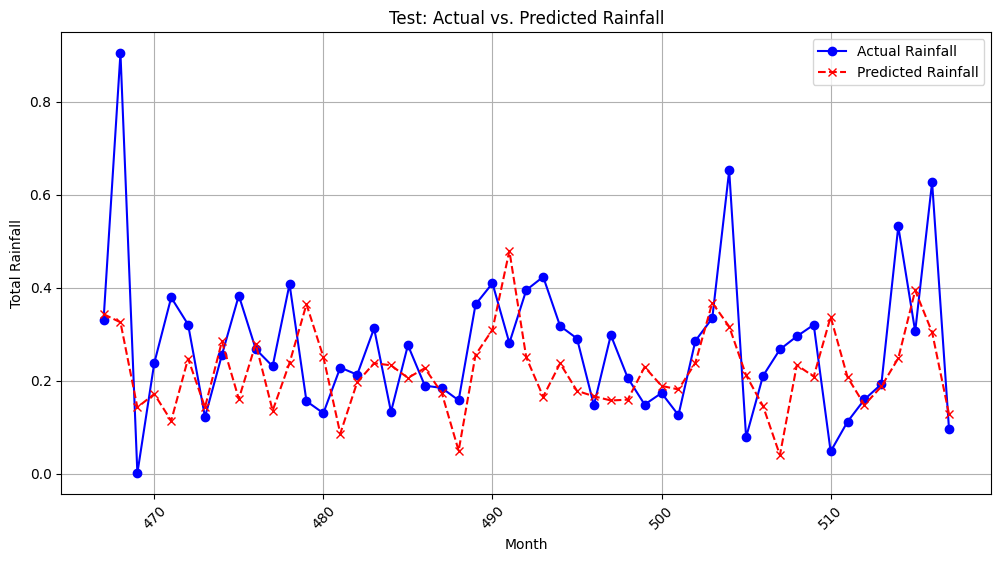

In [ ]:
#best model rnn

best_rnn = RNNModel(input_size).to(device)
best_rnn.load_state_dict(torch.load('models_cp/rnn_model-100.pth'))

evaluate_and_plot(best_rnn, val_loader, y_val, title="Validation: Actual vs. Predicted Rainfall")

evaluate_and_plot(best_rnn, test_loader, y_test, title="Test: Actual vs. Predicted Rainfall")